<a href="https://colab.research.google.com/github/HDS07/Deep_Learning/blob/main/Transfer_learning_flowerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = "/content/drive/MyDrive/flower_set/train"
test_path = "/content/drive/MyDrive/flower_set/test"
val_path = "/content/drive/MyDrive/flower_set/validate"

In [ ]:
datagen_train = ImageDataGenerator(rescale=1./255)
datagen_test = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = datagen_train.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    batch_size=32,  # Adjust batch size if needed
    class_mode='categorical',
    subset='training'
)

Found 3017 images belonging to 5 classes.


In [ ]:
val_data = datagen_val.flow_from_directory(
    directory=val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 435 images belonging to 5 classes.


In [ ]:
test_data = datagen_test.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 865 images belonging to 5 classes.


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_top_layers = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

Epoch 1/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 676s 7s/step - accuracy: 0.2566 - loss: 1.8387 - val_accuracy: 0.4184 - val_loss: 1.5021
Epoch 2/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 655s 7s/step - accuracy: 0.3752 - loss: 1.4945 - val_accuracy: 0.4644 - val_loss: 1.3849
Epoch 3/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 677s 7s/step - accuracy: 0.3915 - loss: 1.4268 - val_accuracy: 0.4667 - val_loss: 1.3171
Epoch 4/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 644s 7s/step - accuracy: 0.4233 - loss: 1.3961 - val_accuracy: 0.4966 - val_loss: 1.2924
Epoch 5/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 686s 7s/step - accuracy: 0.4296 - loss: 1.3782 - val_accuracy: 0.4828 - val_loss: 1.3570


In [ ]:
for layer in base_model.layers:
    layer.trainable = True

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 131s 708ms/step - accuracy: 0.5565 - loss: 2.6522 - val_accuracy: 0.2437 - val_loss: 1.9462
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 78s 353ms/step - accuracy: 0.7685 - loss: 0.6678 - val_accuracy: 0.2437 - val_loss: 2.8442
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 31s 316ms/step - accuracy: 0.8078 - loss: 0.5706 - val_accuracy: 0.2437 - val_loss: 4.9128
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 31s 315ms/step - accuracy: 0.8357 - loss: 0.4393 - val_accuracy: 0.2437 - val_loss: 1.8126
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 31s 316ms/step - accuracy: 0.8979 - loss: 0.3062 - val_accuracy: 0.2437 - val_loss: 2.7147
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 31s 314ms/step - accuracy: 0.9082 - loss: 0.2738 - val_accuracy: 0.2506 - val_loss: 3.6254
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 42s 323ms/step - accuracy: 0.9346 - loss: 0.1967 - val_accuracy: 0.3931 - val_loss: 1.8196
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 32s 321ms/step - accuracy: 0.9477 - loss: 0.1694 - val_acc

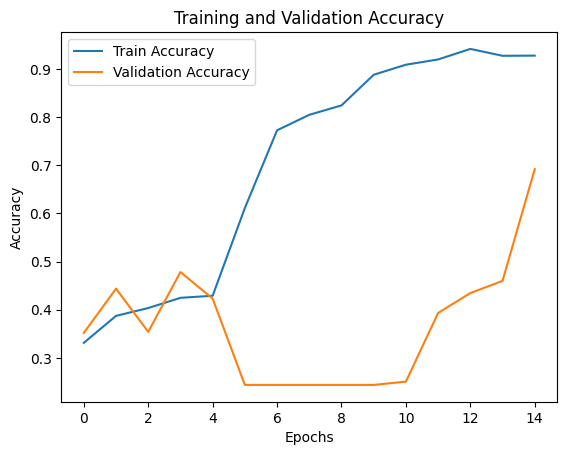

In [ ]:
plt.plot(history_top_layers.history['accuracy'] + history_finetune.history['accuracy'], label='Train Accuracy')
plt.plot(history_top_layers.history['val_accuracy'] + history_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test accuracy: {test_accuracy:.2f}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 247ms/step - accuracy: 0.6412 - loss: 1.2547
Test accuracy: 0.66


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Function to predict a single image
def predict_image(img_path, model, class_indices):
    img = image.load_img(img_path, target_size=(224, 224))  # Load and resize the image
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale the image
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Convert the class index back to the class name
    classes = {v: k for k, v in class_indices.items()}  # Reverse the class_indices mapping
    return classes[predicted_class[0]], predictions[0]

In [ ]:
test_image_paths = [
    "/content/drive/MyDrive/flower_set/test/tulip/12517756805_56b74be742.jpg"
]

In [ ]:
for img_path in test_image_paths:
    predicted_class, prediction_scores = predict_image(img_path, model, train_data.class_indices)
    print(f"Image: {img_path}")
    print(f"Predicted Class: {predicted_class}")
    print(f"Prediction Scores: {prediction_scores}\n")